In [1]:
from importlib import reload
import magnipy
reload(magnipy)
from magnipy import Diversipy
from magnipy.utils.datasets import sample_points_gaussian, sample_points_gaussian_2, sample_points_square, hawkes_process
from magnipy.utils.plots import plot_points
from matplotlib import pyplot as plt
import numpy as np

(200, 2)


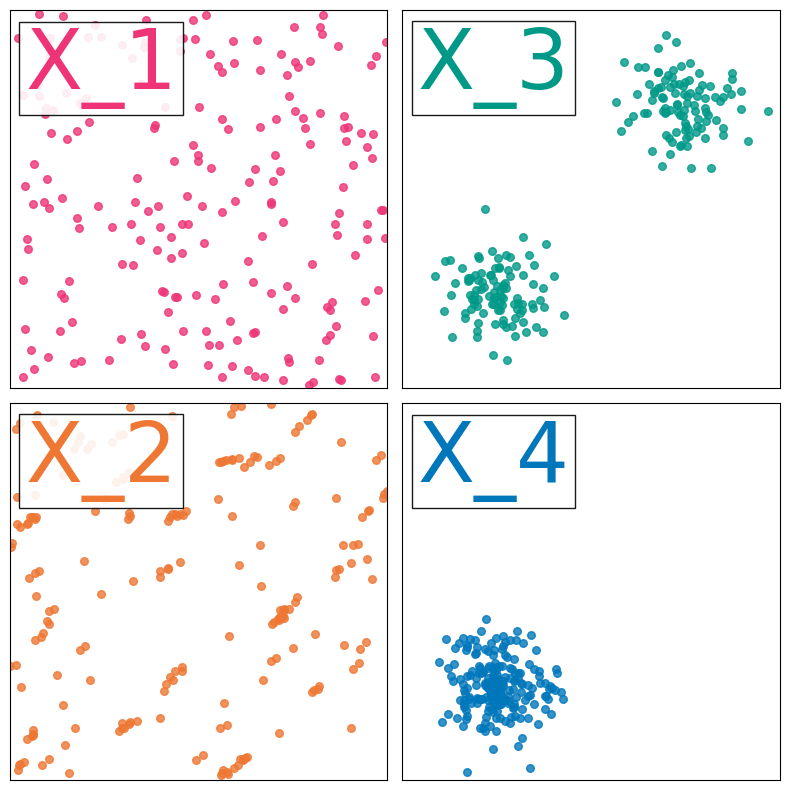

In [2]:


# Sample 200 points from a Gaussian centered at (0, 0.5)
mean1 = [0.5, 0.5]
cov1 = np.eye(2) * 0.02
X4 = sample_points_gaussian(mean1, cov1, 200)

# Sample 100 points each from Gaussians at (0.5, 0.5) and (1.5, 1.5)
mean2 = [[0.5, 0.5], [1.5, 1.5]]
cov2 = np.eye(2) * 0.02
X3 = np.concatenate([sample_points_gaussian(mean, cov2, 100) for mean in mean2])

#Sample 200 points randomly from the square [0, 2]
X1 = sample_points_square(200, 2)

np.random.seed(1)
X2 = hawkes_process(91, 0.6)
print(X2.shape)
X2=(X2*2)[:200,:]

# Plot all points in a single row using subplots
fig2, ax2 = plt.subplots(2, 2, figsize=(8, 8))

axs=[ax2[0,0], ax2[1,0], ax2[0,1], ax2[1,1]]

datasets = [X1, X2, X3, X4]

colors=["#ee3377","#ee7733","#009988", "#0077BB"]
texts = ["X1", "X2", "X3", "X4"]
names = ["X1 random pattern", "X2 clustered pattern", "X3 two Gaussians", "X4 one Gaussian"]

for i, ax in enumerate(axs):
    plot_points(ax, datasets[i], color=colors[i], label=texts[i])

for i, ax in enumerate(axs):
    ax.text(0.04, 0.79, texts[i], transform=ax.transAxes, color=colors[i], fontsize=60, bbox=dict(facecolor='white', alpha=0.9))
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.tight_layout()
plt.show()

In [26]:
diversity = Diversipy(Xs = datasets, names = names, metric="euclidean", n_ts=50, ref_space=0)

mag_functions, ts = diversity.get_magnitude_functions()
t_cut = ts[-1]

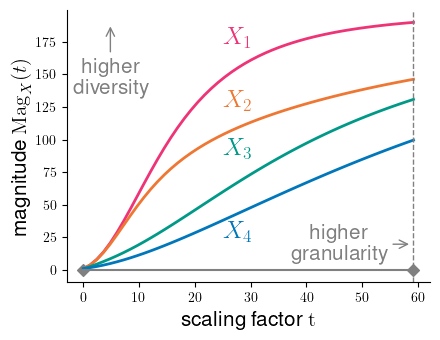

In [27]:
fig, ax = plt.subplots(figsize=(4.5, 3.5))
for i, points in enumerate(datasets):
    mag = mag_functions[i,:]
    ax.plot(ts, mag, c=colors[i], linewidth=2)
    ax.text(25, [173, 125, 88, 24][i], texts[i],  
            color=colors[i], fontsize=18)
ax.set_xlabel(r"scaling factor $\mathrm{t}$", fontsize=15)
ax.set_ylabel(r"magnitude $\mathrm{Mag}_X(t)$", fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Define arrow properties
arrow_up = dict(facecolor='grey', edgecolor='grey', arrowstyle='->')
arrow_right = dict(facecolor='grey', edgecolor='grey', arrowstyle='->')
plt.plot([0, t_cut], [0,0],  color="grey")
plt.scatter([0, t_cut], [0,0],  color="grey", marker="D")
ax.axvline(t_cut, linestyle="--", linewidth=1, c="grey")

# Add upward-facing arrow with text
ax.annotate('higher\ndiversity', xy=(0.12, 0.95), xycoords='axes fraction', xytext=(0.12, 0.75),
            textcoords='axes fraction', arrowprops=arrow_up, fontsize=15,
            ha='center', va='center', color='grey')

# Add right-facing arrow with text
ax.annotate('higher\ngranularity', xy=(0.95, 0.14), xycoords='axes fraction', xytext=(0.75, 0.14),
            textcoords='axes fraction', arrowprops=arrow_right, fontsize=15,
            ha='center', va='center', color='grey')
plt.tight_layout()

In [28]:
diversity.MagAreas()

[133.62672183472628, 98.77287149266445, 69.01930437010819, 47.588518619535165]

In [29]:
diversity.MagDiffs()

array([[ 0.        , 34.85385034, 64.60741746, 86.03820322],
       [34.85385034,  0.        , 29.75356712, 51.18435287],
       [64.60741746, 29.75356712,  0.        , 21.43078575],
       [86.03820322, 51.18435287, 21.43078575,  0.        ]])

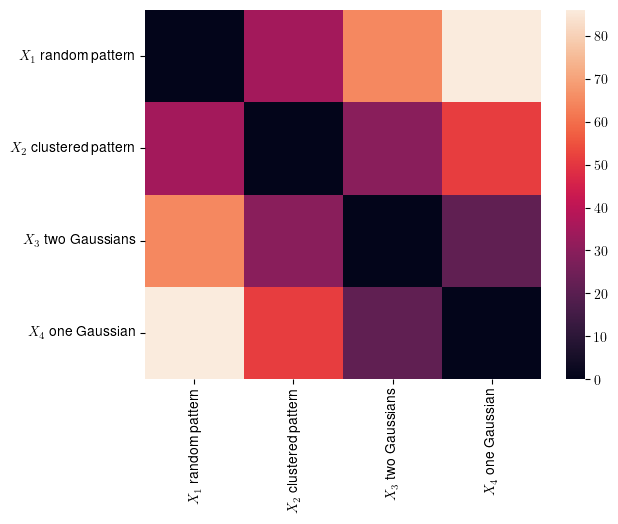

In [30]:
diversity.plot_MagDiffs_heatmap()